In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)

In [3]:
df.columns=['feat1','feat2','feat3','feat4','Target']

In [4]:
df.head()

,feat1,feat2,feat3,feat4,Target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['Target'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Target, dtype: int64

In [6]:
df.isnull().sum()

feat1     0
feat2     0
feat3     0
feat4     0
Target    0
dtype: int64

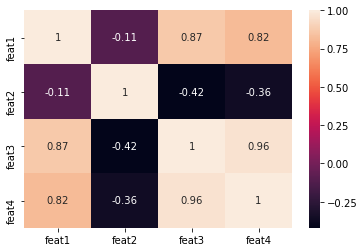

In [7]:
sns.heatmap(df.corr(),annot=True)

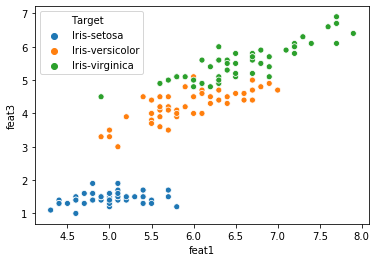

In [8]:
sns.scatterplot(x='feat1',y='feat3',data=df,hue='Target')

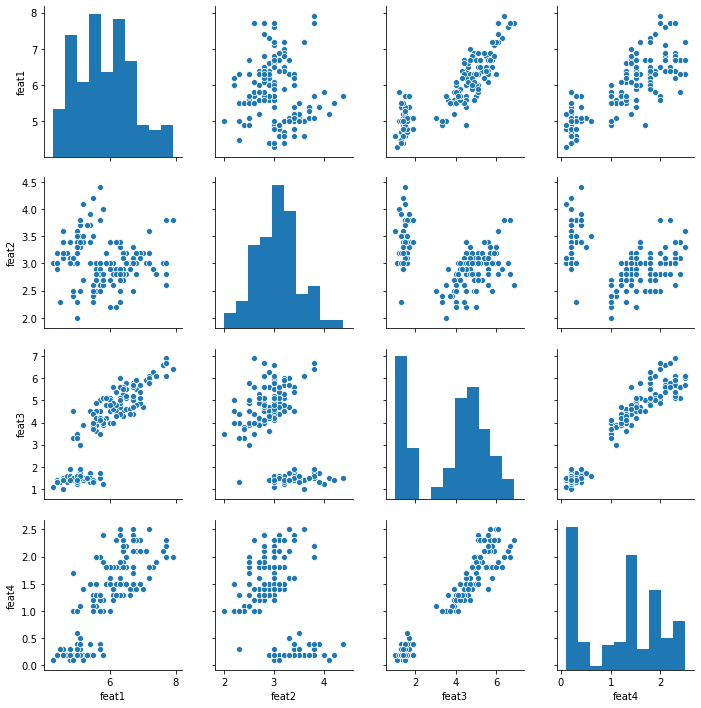

In [9]:
sns.pairplot(df)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df.drop('Target',axis=1))

In [12]:
pca=PCA(n_components=2)

In [13]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

In [15]:
feat=pca.fit_transform(df_scaled)

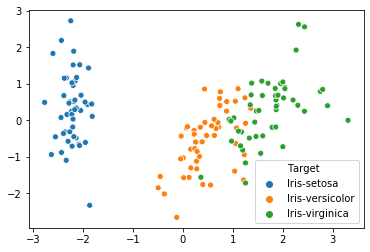

In [16]:
sns.scatterplot(feat[:, 0], feat[:, 1],hue=df['Target'])

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [30]:
from sklearn.model_selection import train_test_split
X=df_scaled
y=df['Target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [31]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
predict = KNN.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(predict,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [35]:
print(confusion_matrix(predict,y_test))

[[16  0  0]
 [ 0 17  0]
 [ 0  0 12]]


In [27]:
score=[]

for i in range (1,20):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    predict = KNN.predict(X_test)
    score.append(sklearn.metrics.accuracy_score(y_test,predict))

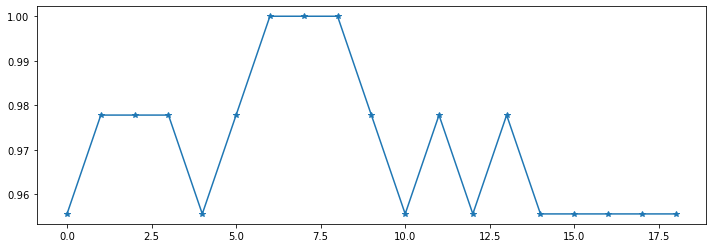

In [37]:
curve= [i for i in (score)]
plt.figure(figsize=(12,4))
plt.plot(curve,'-*')

In [43]:
df_scaled.shape

(150, 4)

In [42]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [94]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim=4))
model.add(Dropout(0.2))

model.add(Dense(8,activation='relu'))

model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 8)                 40        
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 27        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [95]:
from tensorflow.keras.utils import to_categorical


X=df_scaled
y=df['Target']

y=pd.get_dummies(y)

X_train,X_test,y_train,y_test = train_test_split(X,y.values,test_size=0.3)


#y_cat_test = to_categorical(y_test,3)
#y_cat_train=to_categorical(y_train,3)

In [96]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 1s 6ms/sample - loss: 1.1186 - accuracy: 0.2762 - val_loss: 1.0941 - val_accuracy: 0.3111
Epoch 2/200
105/105 [==============================] - 0s 240us/sample - loss: 1.1197 - accuracy: 0.2190 - val_loss: 1.0840 - val_accuracy: 0.3111
Epoch 3/200
105/105 [==============================] - 0s 254us/sample - loss: 1.0950 - accuracy: 0.2762 - val_loss: 1.0738 - val_accuracy: 0.3111
Epoch 4/200
105/105 [==============================] - 0s 359us/sample - loss: 1.0838 - accuracy: 0.2857 - val_loss: 1.0632 - val_accuracy: 0.3333
Epoch 5/200
105/105 [==============================] - 0s 385us/sample - loss: 1.0631 - accuracy: 0.3619 - val_loss: 1.0527 - val_accuracy: 0.4222
Epoch 6/200
105/105 [==============================] - 0s 442us/sample - loss: 1.0549 - accuracy: 0.3619 - val_loss: 1.0424 - val_accuracy: 0.4667
Epoch 7/200
105/105 [==============================] - 0s 484us/sample - lo

In [97]:
loss = pd.DataFrame(model.history.history)

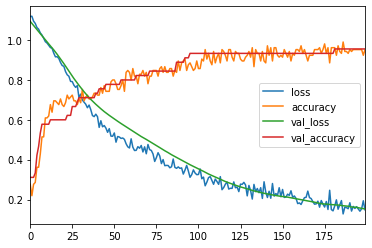

In [98]:
loss.plot()

In [99]:
pred=model.predict_classes(X_test)

In [100]:
print(model.metrics_names)
print(model.evaluate(X_test,y_test,verbose=0))

['loss', 'accuracy']
[0.1525722348027759, 0.95555556]
